<a href="https://colab.research.google.com/github/Baba-777/Repos1/blob/master/E_commerce_Furniture_Dataset_2024___PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Setup Google Colab & Import Libraries

In [10]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

Step 2: Load & Explore Dataset

In [11]:
# Load dataset
df = pd.read_csv('/content/clean data _ ecommerce_furniture_dataset_2024.csv')

# Display first 5 rows
print(df.head())

# Check missing values
print(df.isnull().sum())

# Dataset shape
print("Shape:", df.shape)

                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  
productTitle        0
originalPrice    1355
price               0
sold                0
tagText             2
dtype: int64
Shape: (1792, 5)


Step 3: Data Preprocessing

1- Drop missing values

In [4]:
df = df.dropna(subset=['originalPrice'])  # Optional: Drop rows with missing 'originalPrice'

2-Clean price column (remove $ and convert to float):

In [14]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

3- Encode tagText (categorical):

In [16]:
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

Step 4: Exploratory Data Analysis (EDA)

1- Distribution of sold and price:

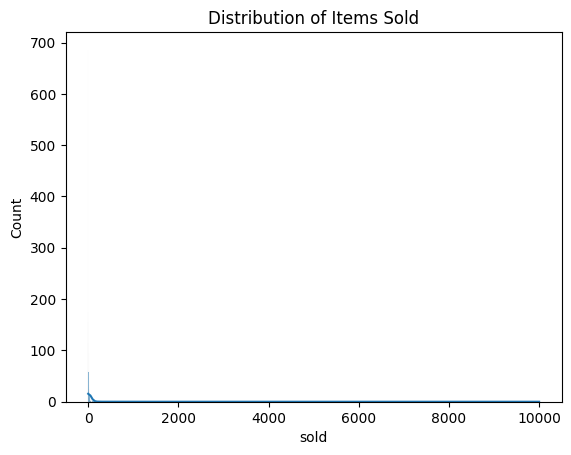

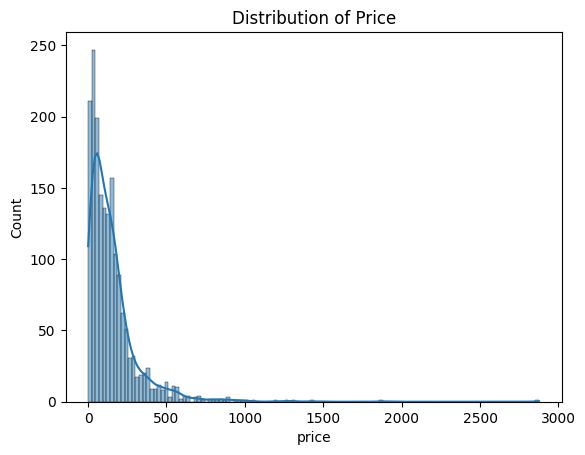

In [17]:
sns.histplot(df['sold'], kde=True)
plt.title('Distribution of Items Sold')
plt.show()

sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

2- Scatter plot (price vs sold):

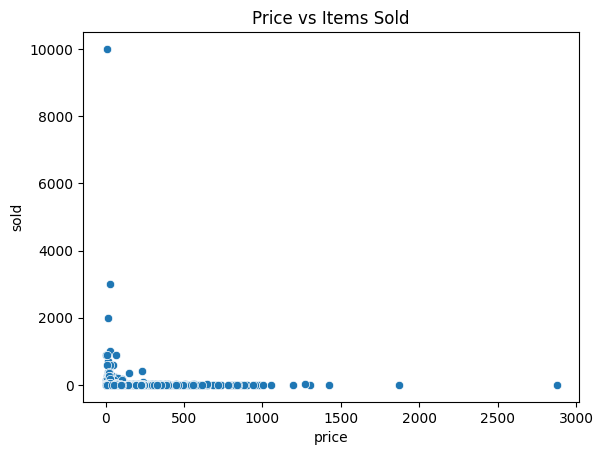

In [18]:
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Price vs Items Sold')
plt.show()

3- Pairplot for numerical columns:

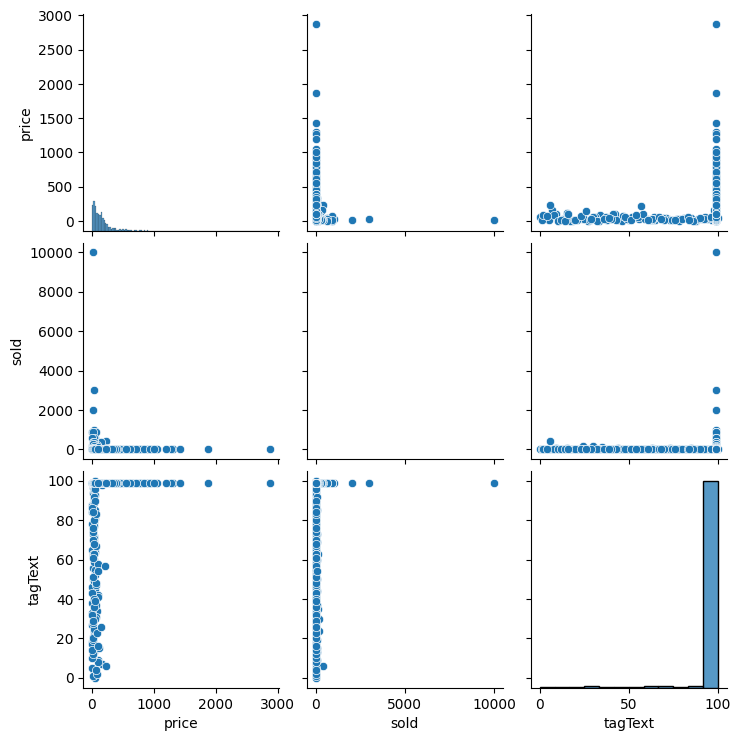

In [19]:
sns.pairplot(df[['price', 'sold', 'tagText']])
plt.show()

STEP -5 Model Building & Evaluation

1. Data Preparation

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/clean data _ ecommerce_furniture_dataset_2024.csv')

# Clean 'price' column (handle both string and numeric cases)
if df['price'].dtype == object:
    df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)
else:
    df['price'] = df['price'].astype(float)  # Ensure float type

# Drop rows with missing 'price' or 'sold' (critical for modeling)
df = df.dropna(subset=['price', 'sold'])

# Encode 'tagText' (simplified binary: 1=Free shipping, 0=Other)
df['tagText'] = df['tagText'].apply(
    lambda x: 1 if str(x).strip().lower() == 'free shipping' else 0
)

2. Feature Engineering

In [28]:
# Feature 1: Price binning (categorize prices into low/medium/high)
df['price_category'] = pd.cut(
    df['price'],
    bins=[0, 50, 200, float('inf')],
    labels=['low', 'medium', 'high']
)

# Feature 2: Numeric encoding for price categories
df['price_category_code'] = df['price_category'].cat.codes

# Final features (X) and target (y)
X = df[['price', 'tagText', 'price_category_code']]
y = df['sold']

3- Train-Test Split

In [31]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Verify shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (1433, 3)
Test data shape: (359, 3)


4- Model Training (Robust Implementation)

In [32]:
# Initialize and train Random Forest
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

5. Model Evaluation (Key Metrics)

In [33]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Random Forest Performance:")
print(f"- MSE: {mse:.2f}")
print(f"- R2 Score: {r2:.2f}")

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:\n", importance)

Random Forest Performance:
- MSE: 26860.71
- R2 Score: 0.04

Feature Importance:
                Feature  Importance
0                price    0.990719
1              tagText    0.007764
2  price_category_code    0.001517


Step 6: Business Insights & Report

In [34]:
# Calculate average sales by price category
price_impact = df.groupby('price_category')['sold'].mean().sort_values(ascending=False)
print("Average Sales by Price Tier:\n", price_impact)

# Compare free vs. paid shipping
shipping_impact = df.groupby('tagText')['sold'].mean()
print("\nFree Shipping Boost:\n", shipping_impact)

Average Sales by Price Tier:
 price_category
low       67.422037
medium     7.936473
high       4.788945
Name: sold, dtype: float64

Free Shipping Boost:
 tagText
0    21.547009
1    23.320000
Name: sold, dtype: float64


/tmp/ipython-input-34-1008745184.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_impact = df.groupby('price_category')['sold'].mean().sort_values(ascending=False)
